In [11]:
### Get stock ticker from yahoo,  plot chart, correlate stock 
# references
#   https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
#   https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [2]:
### Single stock operations

# Fill pandas data frame with Intel stock data for 1 jear 
start = datetime.datetime(2019, 2, 7)
end = datetime.datetime(2020, 2, 6)
ticker = 'INTC'
df = web.DataReader(ticker, 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,65.980003,63.669998,65.800003,63.930000,25268400.0,63.616711
2020-02-03,65.040001,64.300003,64.459999,64.419998,16654600.0,64.104309
2020-02-04,66.059998,64.919998,65.769997,65.459999,20970800.0,65.139214
2020-02-05,67.599998,66.129997,66.690002,67.339996,23401400.0,67.009995
2020-02-06,67.400002,66.769997,67.300003,67.089996,17408000.0,67.089996


In [3]:
# Compute moving average and dividend ajustment
# adjustment reduces close_px by the divdend
# see: https://www.investopedia.com/terms/a/adjusted_closing_price.asp

adj = (df['Close'] - df['Adj Close'])
close_px = df['Adj Close']
avg = close_px.rolling(window=10).mean()

In [4]:
# The data source does not include dividend info
# But it can be computed
# Note: only works if no stock splits or other company actions occurred

div_year=round(adj.sum()/100, 2)
close_at_div = round(df.Close[pd.DatetimeIndex(['2019-02-07'])].item(),2)
div_pct = round(100 * div_year / close_at_div, 2)
print('${}: dividend=${}, in pct={}'.format(close_at_div, div_year, div_pct))

$49.23: dividend=$1.78, in pct=3.62


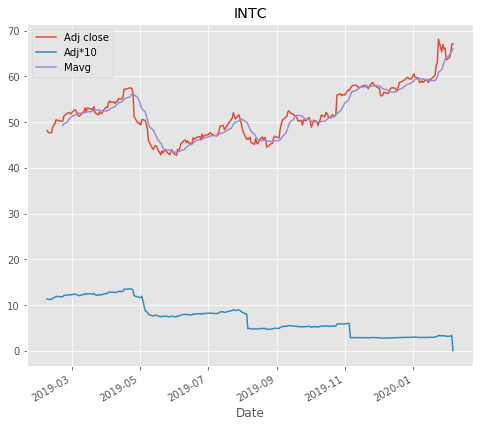

In [5]:
# Plot line chart with closing price, moving average and dividend adjustment
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

mpl.rc('figure', figsize=(8, 7))
style.use('ggplot')

close_px.plot(label='Adj close')
(adj*10).plot(label='Adj*10')
avg.plot(label='Mavg')
plt.title('INTC')
plt.legend();

In [6]:
### Multi stock operations

# Fill pandas data frame with 4 companies stock data for 1 jear 
dfcomp = web.DataReader(['AMD', 'INTC', 'AVGO', 'QCOM'],'yahoo',start=start,end=end)['Adj Close']

In [7]:
# Show returns in percent of these companies stock
retscomp = dfcomp.pct_change()
retscomp[-3:].style.format({
    'AMD':  '{:,.2%}'.format,
    'INTC': '{:,.2%}'.format,
    'AVGO': '{:,.2%}'.format,
    'QCOM': '{:,.2%}'.format,
})

Symbols,AMD,INTC,AVGO,QCOM
Date,,,,
2020-02-04 00:00:00,2.98%,1.61%,2.09%,2.83%
2020-02-05 00:00:00,0.79%,2.87%,1.85%,2.23%
2020-02-06 00:00:00,-1.04%,0.12%,0.73%,-0.33%


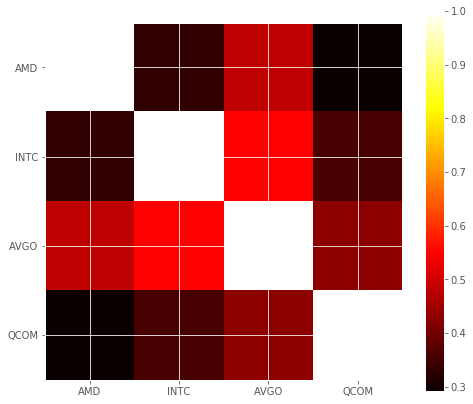

In [8]:
# Correlate these returns and plot them in a heat map
corr = retscomp.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

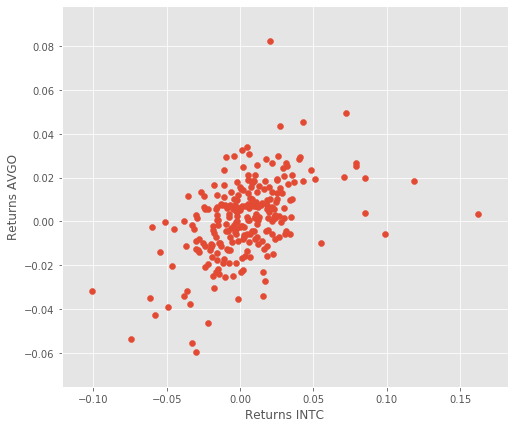

In [9]:
# Do a scatter plot for the "hottest" heat map entry
plt.scatter(retscomp.AMD, retscomp.AVGO)
plt.xlabel('Returns INTC')
plt.ylabel('Returns AVGO');

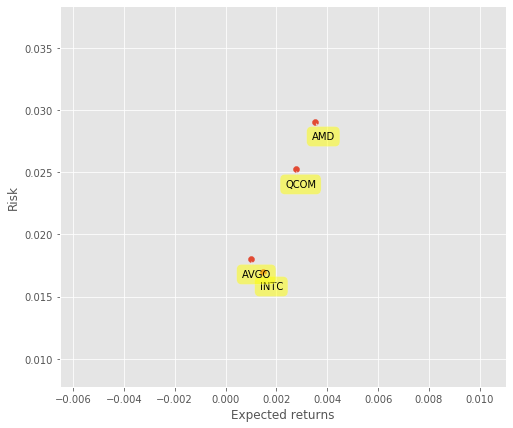

In [10]:
# Show Risk in a Scatter Plot
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))